<a href="https://colab.research.google.com/github/rares985/machine-learning/blob/master/multinomial_logistic_regression_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data("mnist.mpz")

X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

m,n = X_train.shape
k = np.unique(y_train).shape[0]

X_intercept = np.hstack((np.ones((X_train.shape[0],1)), X_train))
X_test_intercept = np.hstack((np.ones((X_test.shape[0],1)), X_test))


y_train = y_train.reshape(-1, 1)
y_test = y_test. reshape(-1, 1)

print(X_intercept.shape)
print(y_train.shape)
print(X_test_intercept.shape)
print(y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 785)
(60000, 1)
(10000, 785)
(10000, 1)


Softmax function is defined as:


In [0]:
def softmax(z):
    z -= np.max(z)
    numerator = np.exp(z)
    denominator = np.sum(np.exp(z), axis=1).reshape(-1, 1)
    sm = numerator / denominator
    return sm

def cross_entropy(predictions, targets, epsilon=1e-12):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions. 
    Input: predictions (N, k) ndarray
           targets (N, k) ndarray        
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions+1e-9))/N
    return ce

100%|██████████| 25/25 [00:10<00:00,  2.28it/s]


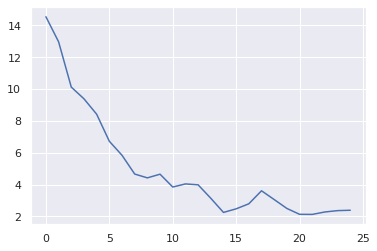

In [6]:
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

learning_rate = 1e-4
epochs = 25


theta = np.random.randn(n+1, k) * np.sqrt(2 / m)

J_hist = []
y_train_oh = np.eye(k)[y_train].squeeze()

for n_ep in tqdm.tqdm(range(epochs)):

    # print('\nX_int @ theta  = {} @ {}'.format(X_intercept.shape, theta.shape))
    
    z = X_intercept @ theta

    # print('Z is of shape {}'.format(z.shape))
    
    y_hat = softmax(z)

    # print('y_hat is of shape {}'.format(y_hat.shape))
    
    # print('y_train_oh is of shape {}'.format(y_train_oh.shape))
    delta = y_hat - y_train_oh

    # print('delta is of shape {}'.format(delta.shape))

    J = cross_entropy(y_hat, y_train_oh)

    J_hist.append(J)

    djdw =  (1/m) *  X_intercept.T @ delta

    # print('djdw is of shape {}'.format(djdw.shape))

    theta -= learning_rate * djdw


plt.plot(J_hist)
plt.show()

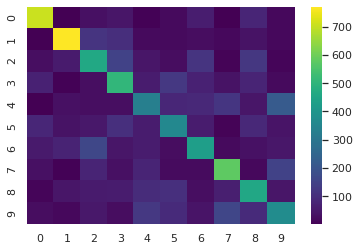

In [5]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = softmax(X_test_intercept @ theta)

class_labels = np.argmax(y_pred, axis=1).reshape(-1, 1)

cm = confusion_matrix(y_test, class_labels)

sns.heatmap(cm,cmap='viridis')